<a href="https://colab.research.google.com/github/Mr-nvk/MachineLearning/blob/master/linear_regression_admissionPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Code to read csv file into Colaboratory:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link1 = "https://drive.google.com/open?id=10jwfcGWLdIbXCqbcUMBWutKjO4e_9Wgf"
link2 = "https://drive.google.com/open?id=1FeFrKDrcj78Vy2IP5_vCoCVBKdzvq6cd"

In [0]:
#creating dataframe from link1
fluff, id = link1.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Addmission_Predict_Ver1.1.csv')  
data1 = pd.read_csv('Addmission_Predict_Ver1.1.csv')

In [0]:
#creating dataframe from link2
fluff, id = link2.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Addmission_Predict.csv')  
data2 = pd.read_csv('Addmission_Predict.csv')

In [0]:
data = pd.concat([data1,data2])

In [0]:
data = data.drop(["Serial No.","Research"],axis=1,).copy()

In [0]:
train = data[:int(data.shape[0]*0.7)]
test = data[int(data.shape[0]*0.7):]

In [12]:
Y = train["Chance of Admit "]
Y = np.reshape(Y,[len(Y),1])
X = train.drop(["Chance of Admit "],axis=1).copy()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [0]:
selectedFeatures = X.columns.values.tolist()

In [14]:
testY = test["Chance of Admit "]
testY = np.reshape(testY,[len(testY),1])
testX = test.drop(["Chance of Admit "],axis=1).copy()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [0]:
no_of_rows,no_of_columns = X.shape

In [0]:
#line function
def line(m,x):
  return np.dot(x,m)

def cost(m,x,y):
  return np.mean((line(m,x) - y)**2)

In [0]:
def derivative(m,x,y):
  return np.dot((2*(line(m,x) - y)).T,x)

In [0]:
## gradient descent
def GradientDescent(m,x,y,iteration,lr): 
  error = []

  for i in range(iteration):
    m = m - lr*derivative(m,x,y)
    error.append(cost(m,x,y))

    if(i%100==0):
      print("error: ",error[i],"iteration: ",i)
  plt.plot(error)

error:  90812964139623.45 iteration:  0
error:  9.01075258202232e+116 iteration:  10
error:  8.941525220176825e+219 iteration:  20
error:  inf iteration:  30
error:  inf iteration:  40
error:  inf iteration:  50
error:  nan iteration:  60
error:  nan iteration:  70
error:  nan iteration:  80
error:  nan iteration:  90
error:  nan iteration:  100
error:  nan iteration:  110
error:  nan iteration:  120
error:  nan iteration:  130
error:  nan iteration:  140
error:  nan iteration:  150
error:  nan iteration:  160
error:  nan iteration:  170
error:  nan iteration:  180
error:  nan iteration:  190
error:  nan iteration:  200
error:  nan iteration:  210
error:  nan iteration:  220
error:  nan iteration:  230
error:  nan iteration:  240
error:  nan iteration:  250
error:  nan iteration:  260
error:  nan iteration:  270
error:  nan iteration:  280
error:  nan iteration:  290
error:  nan iteration:  300


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys


error:  nan iteration:  310
error:  nan iteration:  320
error:  nan iteration:  330
error:  nan iteration:  340
error:  nan iteration:  350
error:  nan iteration:  360
error:  nan iteration:  370
error:  nan iteration:  380
error:  nan iteration:  390
error:  nan iteration:  400
error:  nan iteration:  410
error:  nan iteration:  420
error:  nan iteration:  430
error:  nan iteration:  440
error:  nan iteration:  450
error:  nan iteration:  460
error:  nan iteration:  470
error:  nan iteration:  480
error:  nan iteration:  490
error:  nan iteration:  500
error:  nan iteration:  510
error:  nan iteration:  520
error:  nan iteration:  530
error:  nan iteration:  540
error:  nan iteration:  550
error:  nan iteration:  560
error:  nan iteration:  570
error:  nan iteration:  580
error:  nan iteration:  590
error:  nan iteration:  600
error:  nan iteration:  610
error:  nan iteration:  620
error:  nan iteration:  630
error:  nan iteration:  640
error:  nan iteration:  650
error:  nan iteratio

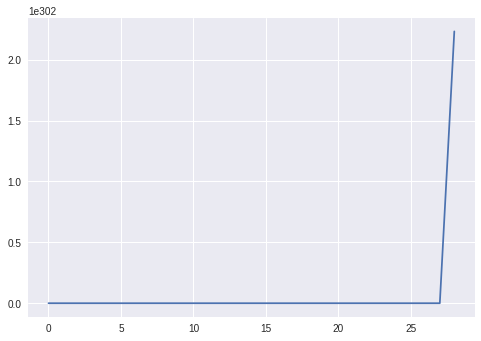

In [21]:
m = np.random.randn(len(X.T),1)  #random value of theta
iteration = 1000
lr = 0.001   #learning rate
GradientDescent(m,X,Y,iteration,lr)

In [22]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21
5,330,115,5,4.5,3.0,9.34
6,321,109,3,3.0,4.0,8.20
7,308,101,2,3.0,4.0,7.90
8,302,102,1,2.0,1.5,8.00
9,323,108,3,3.5,3.0,8.60
